**Samya Sunibir Das 1911563642**

**Question 4:**

In [ ]:
!pip install qiskit
!pip install pylatexenc

In [ ]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
import math

Ques 4

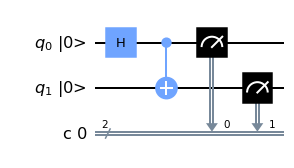

In [ ]:
#create a circuit
circuit = QuantumCircuit(2, 2)  #2 as classical bit as welll for 2 qbits

#gate
circuit.h(0) #single qbit gate
circuit.cx(0, 1)  #0 is control qbit, 1 is target qubit


#apply measurement, 2 lines for 2 qbits
circuit.measure(0,0)
circuit.measure(1,1)

#measurement collapsed the previous superposition

#draw circuit
circuit.draw(output = 'mpl', initial_state = True)

In [12]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

#assemble circuit
qobj = assemble(circuit)

#run on simulator
job = simulator.run(qobj)

#save statevector
circuit.save_statevector()

#monitor job
job_monitor(job)

#get result
result = job.result()

#get statevector
final_state = result.get_statevector()

#collect histogram data
count = result.get_counts()

Job Status: job has successfully run


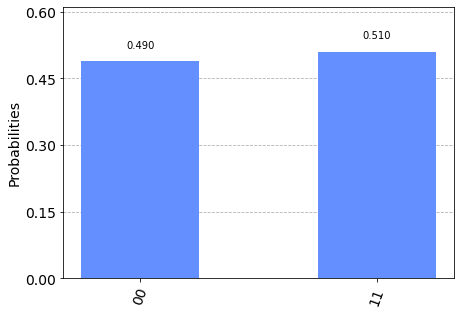

In [ ]:
# visualize
plot_histogram(count)

Quantum Device Test

In [7]:
#save API token from Quantum Experience
IBMQ.save_account('0867ea91ca5b034eae0a347255563a9b593e82e2494db069c9f591454618db0ffad09a6e96700e3b3d7daad6c87d60579d7d60793875d819ef39f1eeaf010602')

#load account
IBMQ.load_account()

#select provider
provider = IBMQ.get_provider('ibm-q')

#select quantum computer from IBM quantum experience
qcomp = provider.get_backend('ibm_nairobi')

#run on real device
job = execute(circuit, backend = qcomp)

#monitor the job
job_monitor(job)

#get result
result = job.result()

#get histogram data
count = result.get_counts()

configrc.store_credentials:WARNING:2022-07-31 17:27:43,249: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-07-31 17:27:43,569: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


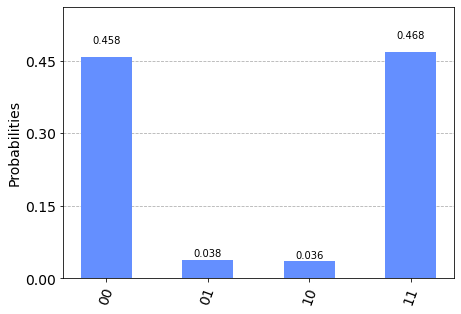

In [8]:
plot_histogram(count)

This generated due to quantum error

In [14]:
print(final_state)
array_to_latex(final_state)
#Measurements collapsed superposition

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

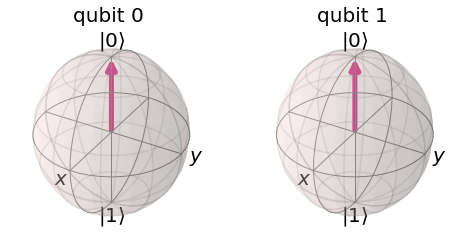

In [15]:
plot_bloch_multivector(final_state)

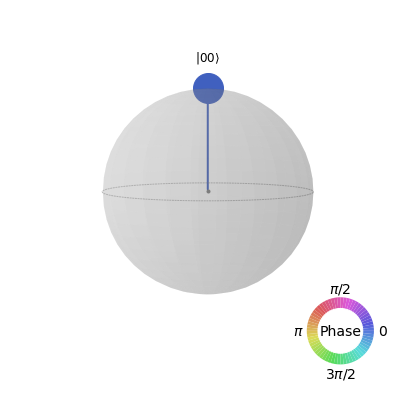

In [16]:
plot_state_qsphere(final_state)   #no longer in superposition as measurement was done